In [3]:
# Basic data set generation
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline
print ("Package loaded")
cwd = os.getcwd()
print ("Current folder is %s" % (cwd))

Package loaded
Current folder is C:\Users\GTKim


In [4]:
# Specify the folder paths
# + Reshape Size + Grayscale
paths = {"FrogReal/Spectrogram/Bro","FrogReal/Spectrogram/Gre","FrogReal/Spectrogram/Nar","FrogReal/Spectrogram/Red"
        ,"FrogReal/Spectrogram/Suw"}
imgsize = [224, 224]
use_gray = 1
data_name = "custom_data"

print ("Your images should be at")
for i, path in enumerate(paths):
    print("[%d/%d] %s/%s" % (i, len(paths), cwd, path))
    
print ("Data will be saved to %s" % (cwd +'/FrogReal/'+data_name+'.npz'))

Your images should be at
[0/5] C:\Users\GTKim/FrogReal/Spectrogram/Gre
[1/5] C:\Users\GTKim/FrogReal/Spectrogram/Nar
[2/5] C:\Users\GTKim/FrogReal/Spectrogram/Bro
[3/5] C:\Users\GTKim/FrogReal/Spectrogram/Red
[4/5] C:\Users\GTKim/FrogReal/Spectrogram/Suw
Data will be saved to C:\Users\GTKim/FrogReal/custom_data.npz


In [5]:
# RGB 2 GRAY Function
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        return rgb

In [7]:
# Load Images
nclass = len(paths)
valid_exts = [".jpg", "gif", ".png", ".tga", ".jpeg"]
imgcnt = 0

for i, relpath in zip(range(nclass), paths):
    path = cwd+"/"+relpath
    flist = os.listdir(path)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)
        currimg = imread(fullpath)
        if use_gray:
            grayimg =  rgb2gray(currimg)
        else:
            grayimg = currimg
        graysmall = imresize(grayimg, [imgsize[0], imgsize[1]])/255.
        grayvec = np.reshape(graysmall, (1, -1))
        curr_label = np.eye(nclass, nclass)[i:i+1, :]
        if imgcnt is 0:
            totalimg = grayvec
            totallabel = curr_label
        else:
            totalimg = np.concatenate((totalimg, grayvec), axis=0)
            totallabel = np.concatenate((totallabel, curr_label), axis=0)
        imgcnt = imgcnt + 1
print ("Total %d images loaded." %(imgcnt))

c:\users\gtkim\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]
c:\users\gtkim\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.92941176 0.41176471 ... 0.49803922 0.56470588 0.93333333]
 ...
 [1.         0.95294118 0.58431373 ... 0.51764706 0.58431373 0.9372549 ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.95294118 0.58431373 ... 0.52156863 0.58823529 0.9372549 ]
 ...
 [1.         0.95294118 0.60784314 ... 0.5372549  0.6        0.94117647]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.9372549  0.48235294 ... 0.47843137 0.54901961 0.93333333]
 ...
 [1.         0.94901961 0.57647059 ... 0.50588235 0.57647059 0.93333333]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94117647 0.53333333 ... 0.49803922 0.56470588 0.93333333]
 ...
 [1.         0.95294118 0.58823529 ... 0.52156863 0.58431373 0.9372549 ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94509804 0.55686275 ... 0.4627451  0.53333333 0.92941176]
 ...
 [1.         0.94901961 0.57647059 ... 0.50588235 0.57254902 0.93333333]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94901961 0.57647059 ... 0.49411765 0.56470588 0.93333333]
 ...
 [1.         0.95294118 0.60392157 ... 0.52156863 0.58823529 0.9372549 ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94509804 0.55294118 ... 0.45490196 0.52941176 0.92941176]
 ...
 [1.         0.94901961 0.57254902 ... 0.48627451 0.55686275 0.93333333]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94509804 0.5372549  ... 0.49019608 0.56078431 0.93333333]
 ...
 [1.         0.94901961 0.56470588 ... 0.49803922 0.56470588 0.93333333]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94901961 0.56470588 ... 0.30980392 0.40392157 0.90980392]
 ...
 [1.         0.95294118 0.59215686 ... 0.51764706 0.58431373 0.9372549 ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94509804 0.55686275 ... 0.47843137 0.54901961 0.93333333]
 ...
 [1.         0.94901961 0.57254902 ... 0.50588235 0.57647059 0.93333333]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94509804 0.55686275 ... 0.42745098 0.50588235 0.9254902 ]
 ...
 [1.         0.94901961 0.57254902 ... 0.51372549 0.58039216 0.9372549 ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94509804 0.55686275 ... 0.52156863 0.58431373 0.9372549 ]
 ...
 [1.         0.95294118 0.59607843 ... 0.47843137 0.54901961 0.93333333]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94509804 0.54509804 ... 0.50588235 0.57647059 0.93333333]
 ...
 [1.         0.95294118 0.61176471 ... 0.5372549  0.6        0.94117647]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94901961 0.56470588 ... 0.49019608 0.56078431 0.93333333]
 ...
 [1.         0.94901961 0.57647059 ... 0.51372549 0.58039216 0.9372549 ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94117647 0.49411765 ... 0.50588235 0.57254902 0.93333333]
 ...
 [1.         0.95294118 0.58823529 ... 0.5372549  0.6        0.94117647]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.95294118 0.58823529 ... 0.48627451 0.55686275 0.93333333]
 ...
 [1.         0.95294118 0.58823529 ... 0.52156863 0.58823529 0.9372549 ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.95294118 0.61960784 ... 0.56470588 0.62745098 0.94117647]
 ...
 [1.         0.95294118 0.61960784 ... 0.58431373 0.63921569 0.94509804]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94509804 0.5372549  ... 0.48627451 0.55686275 0.93333333]
 ...
 [1.         0.94901961 0.57647059 ... 0.45882353 0.52941176 0.92941176]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 

 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94509804 0.55294118 ... 0.37254902 0.4627451  0.91764706]
 ...
 [1.         0.95294118 0.58823529 ... 0.48627451 0.55686275 0.93333333]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94901961 0.56862745 ... 0.51372549 0.58039216 0.9372549 ]
 ...
 [1.         0.95294118 0.59607843 ... 0.5254902  0.59215686 0.9372549 ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ...

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.95294118 0.6        ... 0.5372549  0.6        0.94117647]
 ...
 [1.         0.95294118 0.60784314 ... 0.54117647 0.60392157 0.94117647]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94901961 0.57254902 ... 0.51764706 0.58431373 0.9372549 ]
 ...
 [1.         0.95294118 0.59215686 ... 0.5372549  0.6        0.94117647]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94509804 0.54117647 ... 0.44313725 0.52156863 0.9254902 ]
 ...
 [1.         0.94901961 0.55686275 ... 0.51372549 0.58039216 0.9372549 ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94901961 0.57254902 ... 0.4627451  0.5372549  0.92941176]
 ...
 [1.         0.95294118 0.58431373 ... 0.49019608 0.56078431 0.93333333]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.95294118 0.58823529 ... 0.45098039 0.52941176 0.92941176]
 ...
 [1.         0.94509804 0.55686275 ... 0.52156863 0.58431373 0.9372549 ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.94509804 0.55686275 ... 0.47058824 0.54117647 0.93333333]
 ...
 [1.         0.94509804 0.55686275 ... 0.5254902  0.59215686 0.9372549 ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 

KeyboardInterrupt: 

In [5]:
# Divide Total Data into Training and Test Set
def print_shape(string, x):
    print ("Shape of '%s' is %s" % (string, x.shape,))
    
randidx    = np.random.randint(imgcnt, size=imgcnt)
trainidx   = randidx[0:int(4*imgcnt/5)]
testidx    = randidx[int(4*imgcnt/5):imgcnt]
trainimg   = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg    = totalimg[testidx, :]
testlabel  = totallabel[testidx, :]
print_shape("trainimg", trainimg)
print_shape("trainlabel", trainlabel)
print_shape("testimg", testimg)
print_shape("testlabel", testlabel)

Shape of 'trainimg' is (600, 50176)
Shape of 'trainlabel' is (600, 5)
Shape of 'testimg' is (150, 50176)
Shape of 'testlabel' is (150, 5)


In [6]:
# Save to npz
savepath = cwd +'/FrogReal/'+data_name+'.npz'
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel
         , testimg=testimg, testlabel=testlabel, imgsize=imgsize, use_gray=use_gray)
print ("Saved to %s" % (savepath))

Saved to C:\Users\GTKim/FrogReal/custom_data.npz


In [7]:
# Load them!
cwd = os.getcwd()
loadpath = cwd +'/FrogReal/'+data_name+'.npz'
l = np.load(loadpath)

# See what's in here
l.files

# Parse data
trainimg_loaded = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded = l['testimg']
testlabel_loaded = l['testlabel']

print ("%d train images loaded" % (trainimg_loaded.shape[0]))
print ("%d test images loaded" % (testimg_loaded.shape[0]))
print ("Loaded from to %s" % (savepath))

600 train images loaded
150 test images loaded
Loaded from to C:\Users\GTKim/FrogReal/custom_data.npz


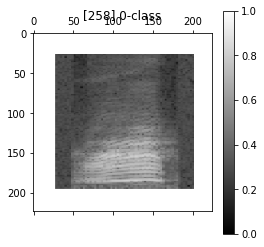

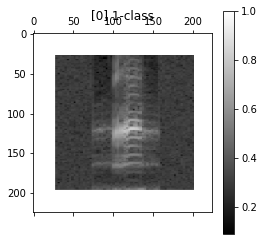

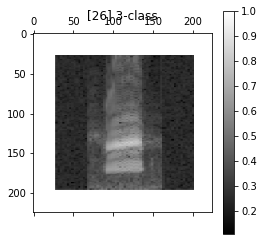

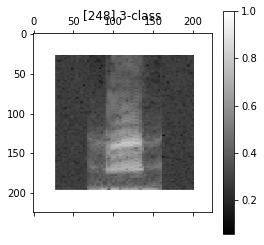

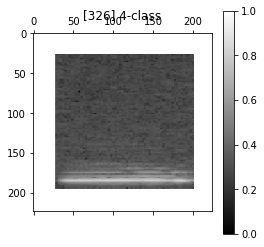

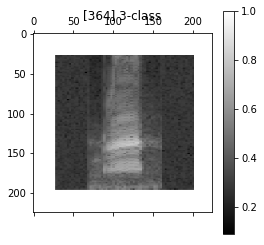

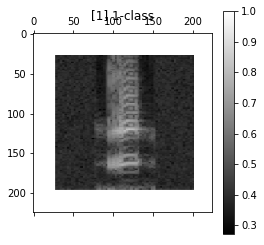

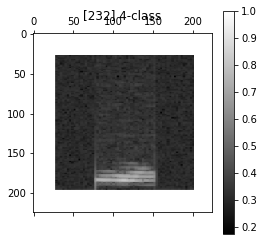

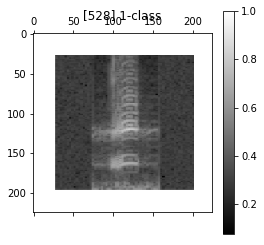

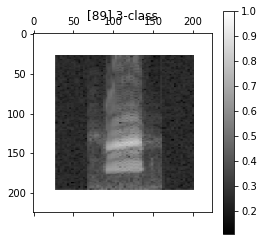

In [8]:
# Plot Randomly selected train images
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 10;
randidx = np.random.randint(ntrain_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(trainimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    if use_gray:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(trainimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()

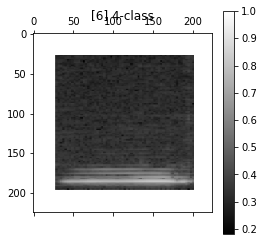

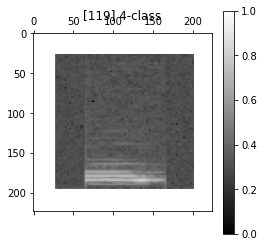

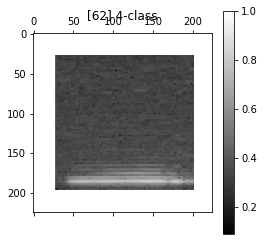

In [9]:
# Plot Randomly Selected Test Images
# Do batch stuff using loaded data 
ntest_loaded = testimg_loaded.shape[0]
batch_size   = 3;
randidx      = np.random.randint(ntest_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(testimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = testlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    
    if use_gray:
        currimg = np.reshape(testimg[i, :], (imgsize[0], -1))
        plt.matshow(currimg, cmap=plt.get_cmap('gray'))
        plt.colorbar()
    else:
        currimg = np.reshape(testimg[i, :], (imgsize[0], imgsize[1], 3))
        plt.imshow(currimg)
    title_string = "[%d] %d-class" % (i, currlabel)
    plt.title(title_string) 
    plt.show()